## データ準備

In [10]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


AttributeError: partially initialized module 'seaborn' has no attribute 'histplot' (most likely due to a circular import)

In [7]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip']/df['total_bill']


NameError: name 'sns' is not defined

In [85]:
type(df)

pandas.core.frame.DataFrame

## Data visualization

In [22]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


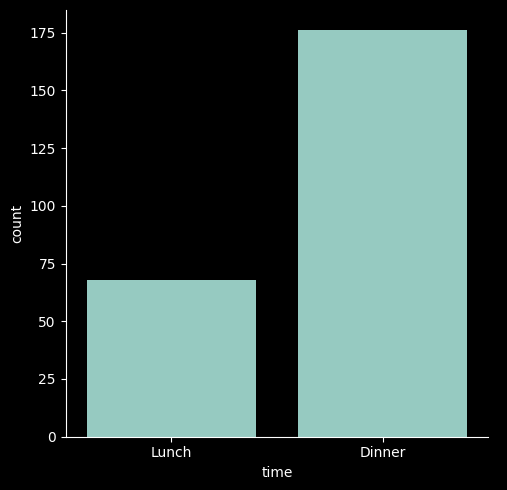

In [27]:
sns.catplot(x = 'time', data = df, kind='count')

In [34]:
x = df['total_bill'].mean()
x

19.78594262295082

## Average

In [35]:
np.mean(df['total_bill'])

19.78594262295082

In [36]:
df['tip_rate'].mean()

0.16080258172250472

In [37]:
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [54]:
df.groupby(by='sex', observed=False)['tip_rate'].mean()

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<Axes: xlabel='sex', ylabel='tip_rate'>

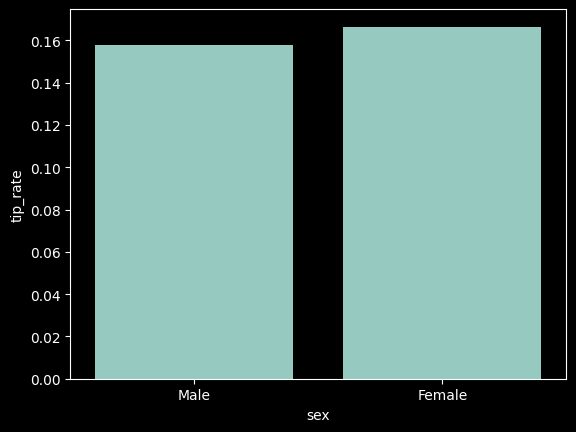

In [59]:
sns.barplot(x='sex', y='tip_rate', data=df, errorbar=None)

/var/folders/bs/5s1ykt9s6ds8yd_6753l8sfw0000gn/T/ipykernel_86506/319352966.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['tip_rate'].mean().plot(kind='bar')


<Axes: xlabel='sex'>

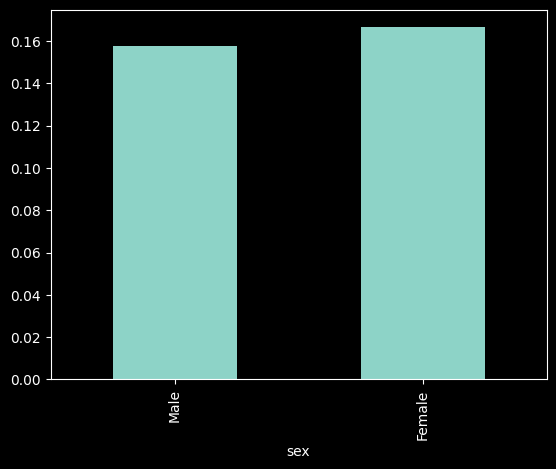

In [63]:
df.groupby('sex')['tip_rate'].mean().plot(kind='bar')

## Median

In [66]:
np.median(df['tip_rate'])

0.15476977125802577

In [67]:
df['tip_rate'].median()

0.15476977125802577

<Axes: xlabel='tip_rate', ylabel='Count'>

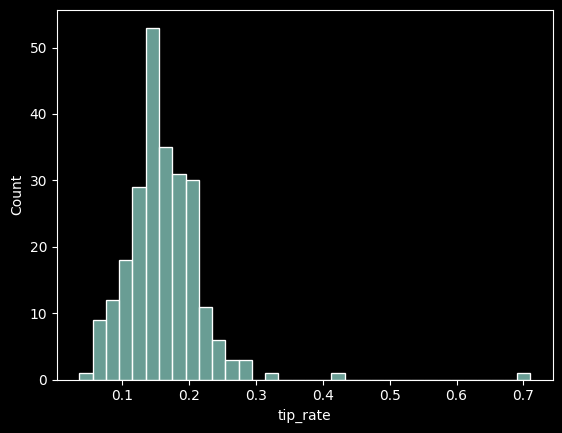

In [71]:
snsistplot(data=df, x='tip_rate')

In [102]:
df.groupby('sex').median(numeric_only=True)

/var/folders/bs/5s1ykt9s6ds8yd_6753l8sfw0000gn/T/ipykernel_86506/778979430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex').median(numeric_only=True)


,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


In [101]:
print(df.groupby('sex'))

/var/folders/bs/5s1ykt9s6ds8yd_6753l8sfw0000gn/T/ipykernel_86506/2458680448.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('sex'))


<Axes: xlabel='sex', ylabel='tip_rate'>

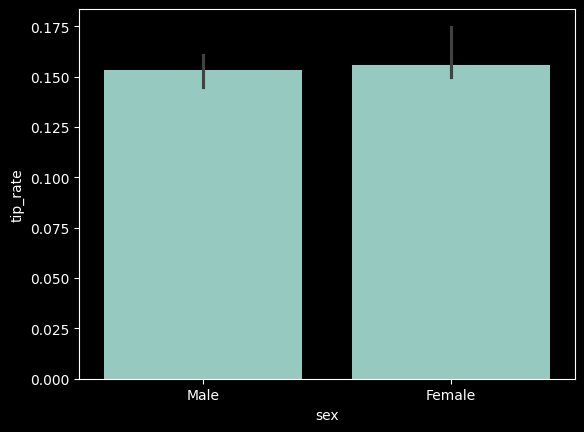

In [104]:
sns.barplot(x = 'sex', y='tip_rate', data=df, estimator='median')

In [105]:
df.sort_values('tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## Mode

In [116]:
mode, count = stats.mode(df)

/var/folders/bs/5s1ykt9s6ds8yd_6753l8sfw0000gn/T/ipykernel_86506/3855105828.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, count = stats.mode(df)
/var/folders/bs/5s1ykt9s6ds8yd_6753l8sfw0000gn/T/ipykernel_86506/3855105828.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode, count = stats.mode(df)


In [117]:
print(mode, count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]] [[  3  33 157 151  87 176 156   2]]


In [124]:
df['sex'].mode()

0    Male
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

## Range

In [129]:
df.groupby('sex').max(numeric_only=True)

/var/folders/bs/5s1ykt9s6ds8yd_6753l8sfw0000gn/T/ipykernel_86506/2116712309.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex').max(numeric_only=True)


,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


In [130]:
df['tip'].max() - df['tip'].min()

9.0

## Quantile

In [137]:
np.quantile([1,2,3,4,5,6], [0.25, 0.5, 0.75, 0.9])

array([2.25, 3.5 , 4.75, 5.5 ])

In [139]:
df['tip_rate'].quantile([0.25,0.5,0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [142]:
stats.iqr(df['tip_rate']) / 2

0.031174062293445756

<Axes: xlabel='sex', ylabel='tip_rate'>

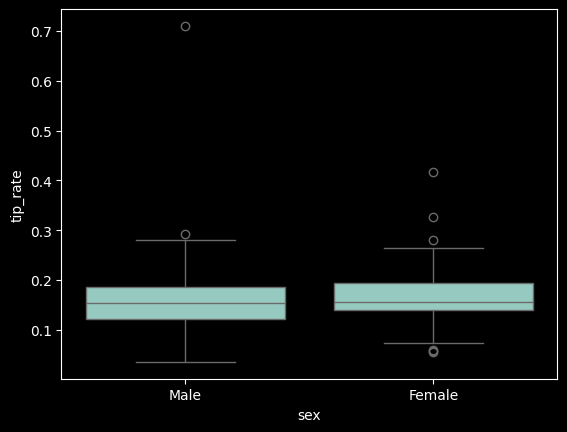

In [149]:
sns.boxplot(x = df['sex'], y=df['tip_rate'])

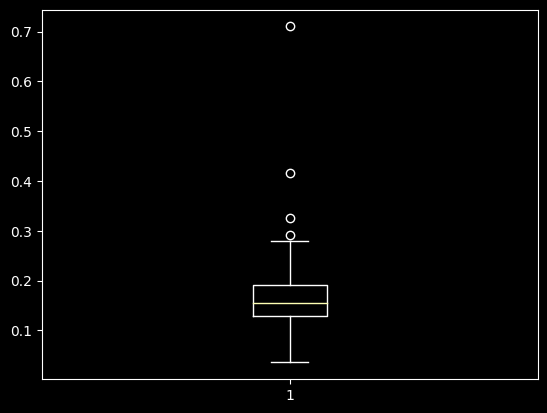

In [146]:
plt.boxplot(df['tip_rate'])
plt.show()

## Variance and Standard Deviation 

In [153]:
np.var(df['tip'])

1.9066085124966412

In [155]:
np.std(df['tip'])

1.3807999538298954

## Covariance Matrix / 共分散


In [2]:
np.cov(df['total_bill'], df['tip'], bias=True)

NameError: name 'np' is not defined